In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, ZeroPadding2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

In [2]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [3]:
X_train, y_train = load_mnist('fashionmnist', kind='train')
X_test, y_test = load_mnist('fashionmnist', kind='t10k')

In [4]:
X_test.shape

(10000, 784)

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
X_train[1000]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 97],
        [ 84],
        [ 97],
        [110],
        [108],
        [ 87],
        [ 97],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 19],
        [255],
        [199],
        [183],
        [142],
        [161],
        [200],
        [213],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
model = Sequential([
    ZeroPadding2D(padding=(1, 1), input_shape=(28, 28, 1)),
    Conv2D(32, 3, activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=2, strides=2),
    ZeroPadding2D(padding=(1, 1)),
    Conv2D(64, 3, activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])
model.summary()

C:\Users\amir\anaconda3\Lib\site-packages\keras\src\layers\reshaping\zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)  │ (None, 30, 30, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_1                │ (None, 16, 16, 32)     │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [14]:
history = model.fit(X_train, y_train_ohe, epochs=5, validation_data=(X_test, y_test_ohe), batch_size=300)

Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 52s 240ms/step - accuracy: 0.6584 - loss: 0.9574 - val_accuracy: 0.8586 - val_loss: 0.4459
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 48s 239ms/step - accuracy: 0.8449 - loss: 0.4347 - val_accuracy: 0.8709 - val_loss: 0.3881
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 48s 240ms/step - accuracy: 0.8668 - loss: 0.3736 - val_accuracy: 0.8816 - val_loss: 0.3454
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 48s 239ms/step - accuracy: 0.8796 - loss: 0.3381 - val_accuracy: 0.8870 - val_loss: 0.3186
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 48s 241ms/step - accuracy: 0.8891 - loss: 0.3079 - val_accuracy: 0.8923 - val_loss: 0.3063


<Axes: >

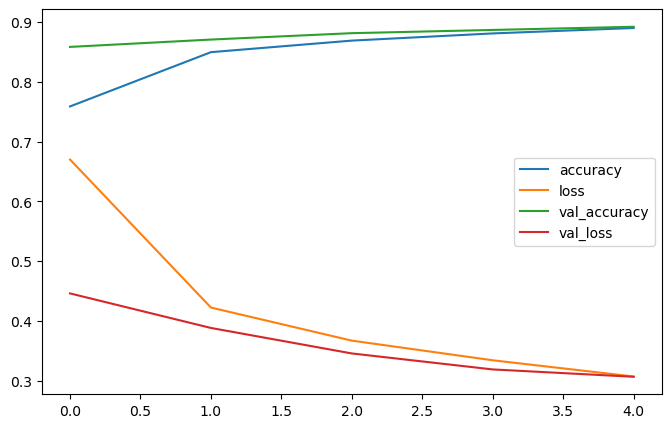

In [15]:
import pandas as pd
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
pd.DataFrame(history.history).plot(figsize=(8,5))

In [16]:
history.history

{'accuracy': [0.7589499950408936,
  0.8497999906539917,
  0.8691499829292297,
  0.8811833262443542,
  0.890250027179718],
 'loss': [0.6700337529182434,
  0.4222263991832733,
  0.3668326139450073,
  0.3339538872241974,
  0.3067800998687744],
 'val_accuracy': [0.8586000204086304,
  0.8708999752998352,
  0.881600022315979,
  0.8870000243186951,
  0.892300009727478],
 'val_loss': [0.4458979070186615,
  0.38806983828544617,
  0.3453812599182129,
  0.3186134994029999,
  0.30632585287094116]}

In [17]:
model.save('masoud.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Saved output of layer 0 to layer_outputs\layer_0_output.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Saved output of layer 1 to layer_outputs\layer_1_output.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Saved output of layer 2 to layer_outputs\layer_2_output.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Saved output of layer 3 to layer_outputs\layer_3_output.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Saved output of layer 4 to layer_outputs\layer_4_output.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Saved output of layer 5 to layer_outputs\layer_5_output.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Saved output of layer 6 to layer_outputs\layer_6_output.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Saved output of layer 7 to layer_outputs\layer_7_output.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Saved output of layer 8 to layer_outputs\layer_8_output.npy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Saved output of layer 9 to layer_outputs\layer_9_output.npy
1/1 ━━━━━━━━━━━━

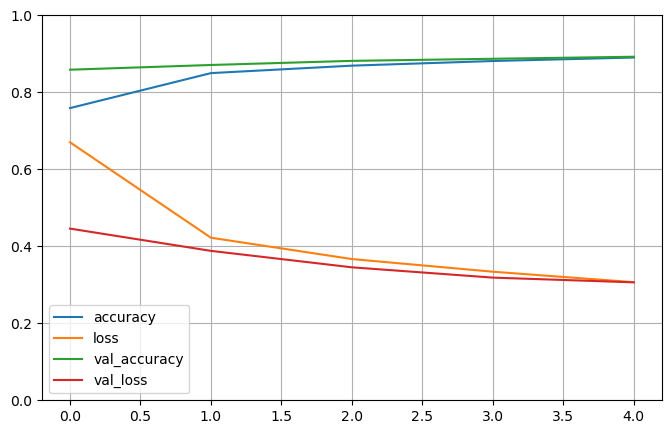

In [25]:
# Create a directory to save the outputs
output_dir = 'layer_outputs'
os.makedirs(output_dir, exist_ok=True)

# Function to create a model that outputs a specific layer
def create_sub_model(layer_index):
    sub_model = Model(inputs=model.inputs, outputs=model.layers[layer_index].output)
    return sub_model

# Save the output of each layer for a sample input
sample_input = np.expand_dims(X_test[0], axis=0)  # Take the first test image

for layer_index, layer in enumerate(model.layers):
    sub_model = create_sub_model(layer_index)
    layer_output = sub_model.predict(sample_input)
    
    # Save the layer output to a file
    output_path = os.path.join(output_dir, f'layer_{layer_index}_output.npy')
    np.save(output_path, layer_output)
    print(f'Saved output of layer {layer_index} to {output_path}')

# Plot the training history
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

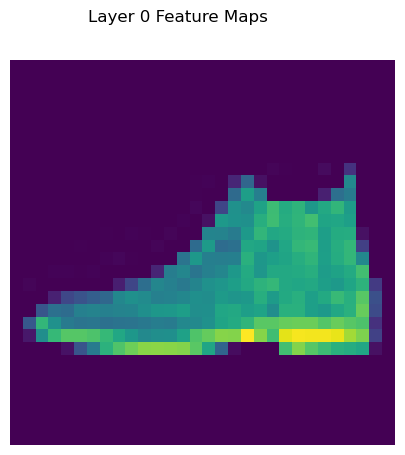

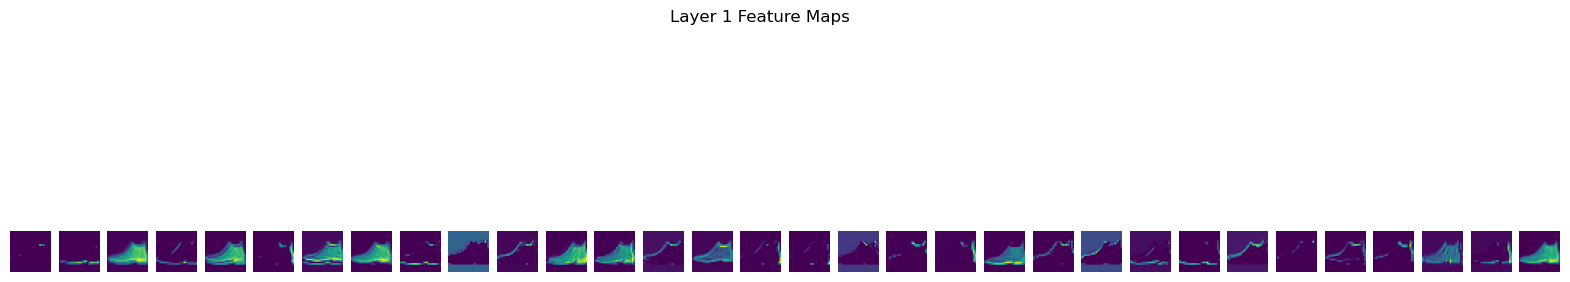

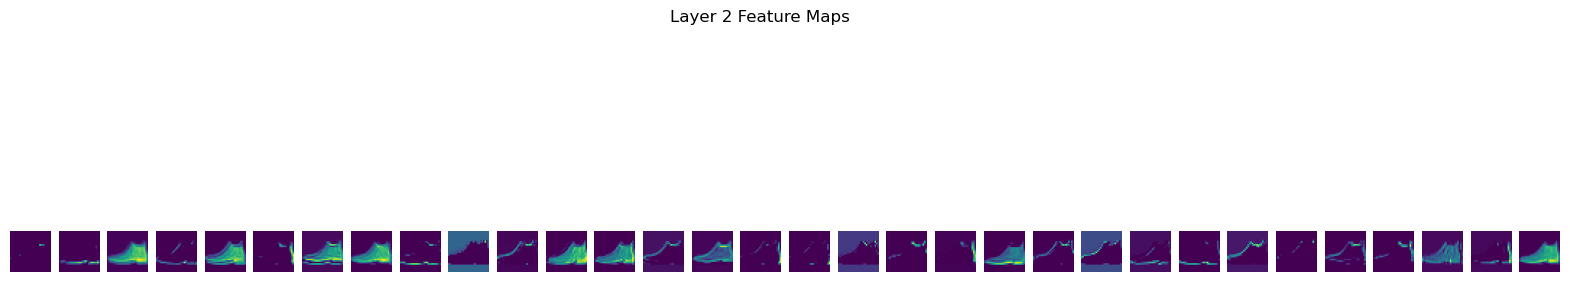

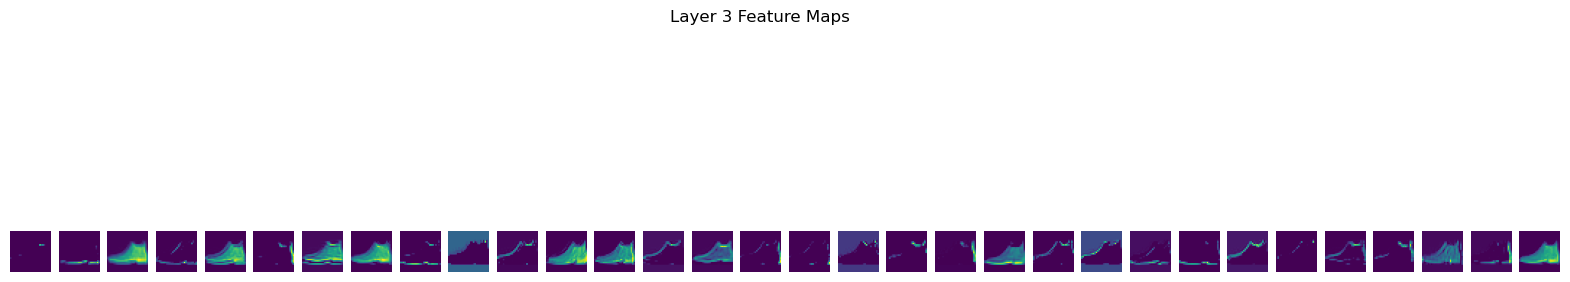

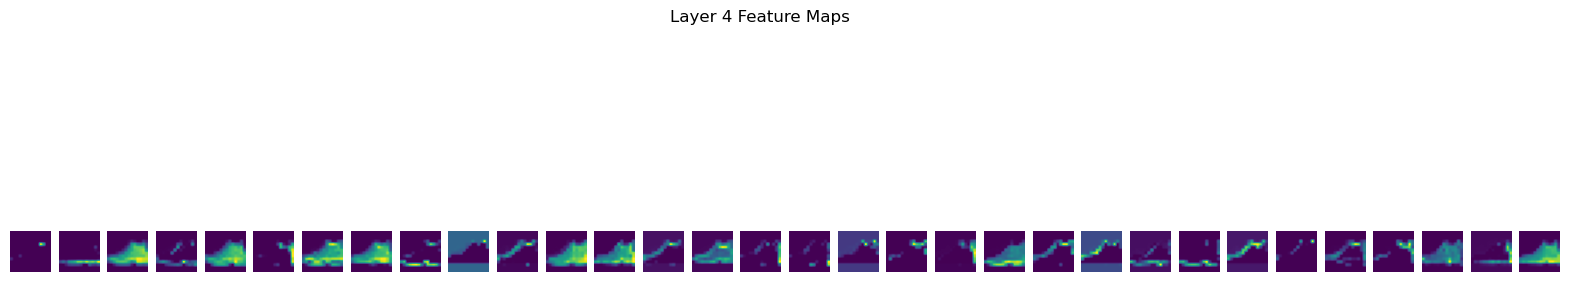

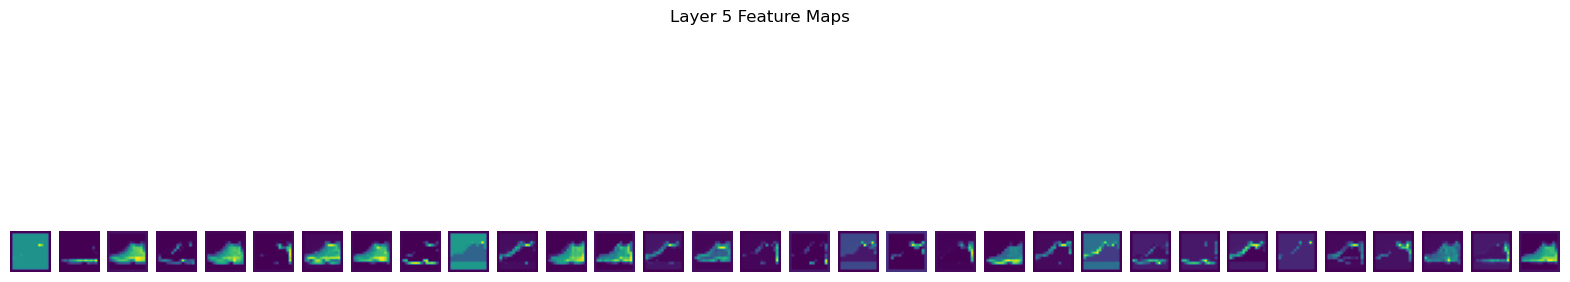

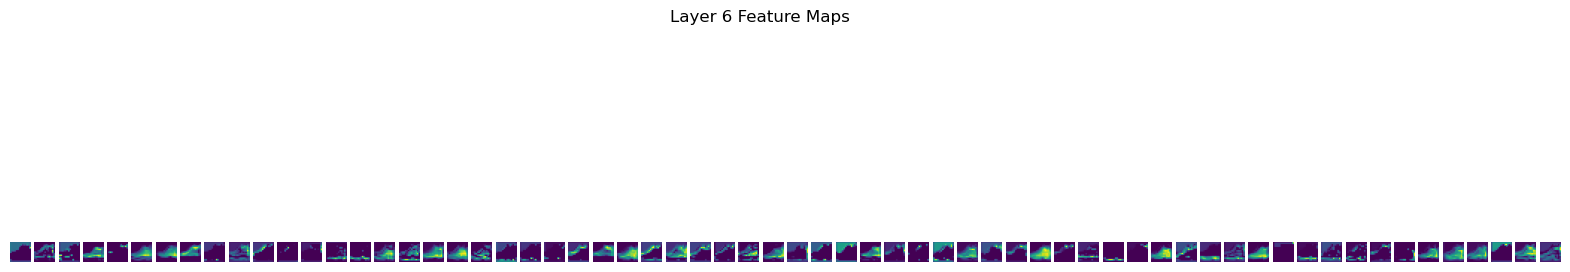

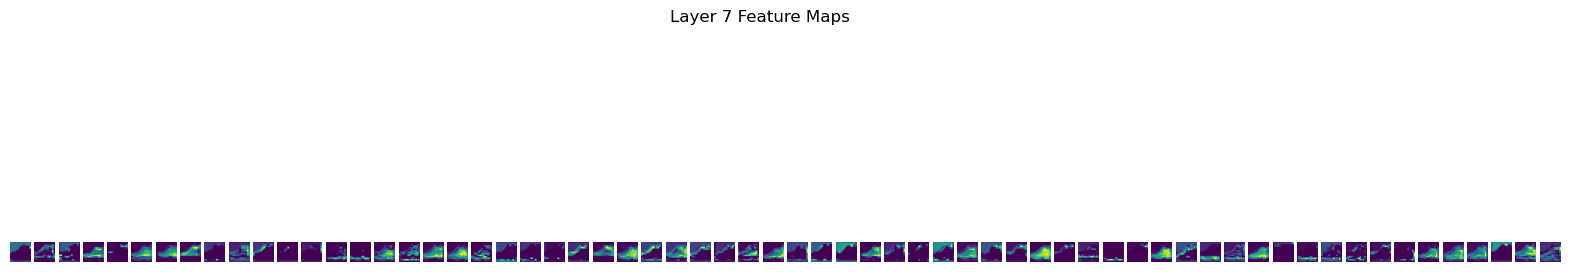

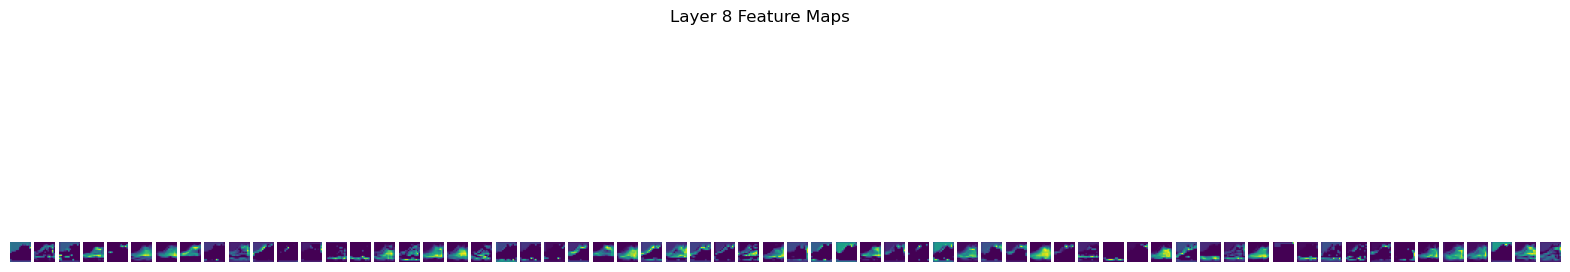

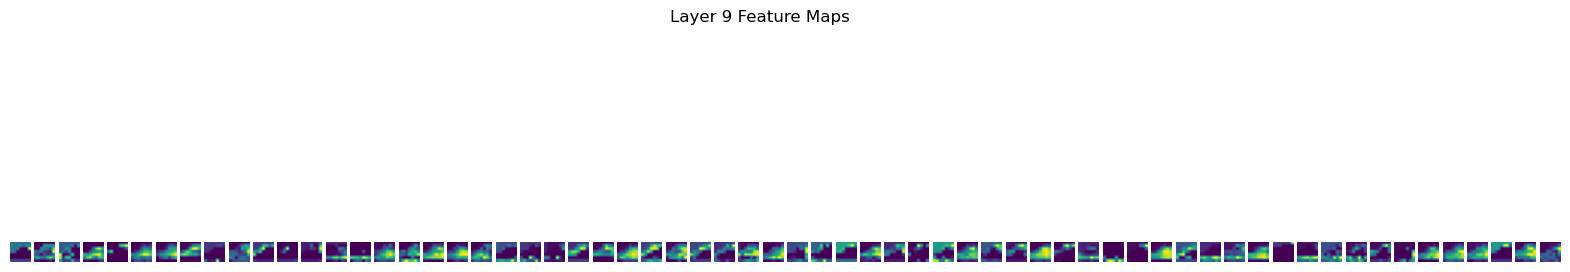

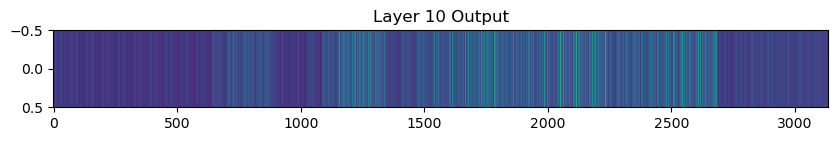

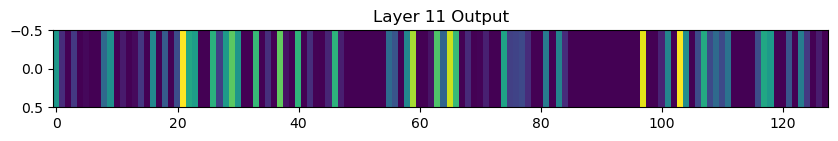

In [27]:
import numpy as np
import matplotlib.pyplot as plt

output_dir = 'layer_outputs'

for layer_index in range(len(model.layers)):
    output_path = os.path.join(output_dir, f'layer_{layer_index}_output.npy')
    layer_output = np.load(output_path)
    
    # Visualize the feature maps
    if len(layer_output.shape) == 4:  # Conv layers
        n_filters = layer_output.shape[-1]
        fig, axes = plt.subplots(1, n_filters, figsize=(20, 5))
        if n_filters == 1:
            axes = [axes]
        for i in range(n_filters):
            axes[i].imshow(layer_output[0, :, :, i], cmap='viridis')
            axes[i].axis('off')
        plt.suptitle(f'Layer {layer_index} Feature Maps')
        plt.show()
    elif len(layer_output.shape) == 2:  # Dense layers
        plt.figure(figsize=(10, 1))
        plt.imshow(layer_output, aspect='auto', cmap='viridis')
        plt.title(f'Layer {layer_index} Output')
        plt.show()


In [28]:
# Save feature maps
output_dir = 'layer_outputs'
save_dir = 'feature_maps_images'
os.makedirs(save_dir, exist_ok=True)

for layer_index in range(len(model.layers)):
    output_path = os.path.join(output_dir, f'layer_{layer_index}_output.npy')
    layer_output = np.load(output_path)
    
    # Visualize the feature maps and save the images
    if len(layer_output.shape) == 4:  # Conv layers
        n_filters = layer_output.shape[-1]
        fig, axes = plt.subplots(1, n_filters, figsize=(20, 5))
        if n_filters == 1:
            axes = [axes]
        for i in range(n_filters):
            axes[i].imshow(layer_output[0, :, :, i], cmap='viridis')
            axes[i].axis('off')
        plt.suptitle(f'Layer {layer_index} Feature Maps')
        fig.savefig(os.path.join(save_dir, f'layer_{layer_index}_feature_maps.png'))
        plt.close(fig)
    elif len(layer_output.shape) == 2:  # Dense layers
        plt.figure(figsize=(10, 1))
        plt.imshow(layer_output, aspect='auto', cmap='viridis')
        plt.title(f'Layer {layer_index} Output')
        plt.savefig(os.path.join(save_dir, f'layer_{layer_index}_output.png'))
        plt.close()


In [23]:
# MasoudKaviani.ir